In [27]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest = pd.read_csv("../../data_files/data_from_android_api/rest/rest_25_mins.csv")

left = pd.read_csv("../../data_files/data_from_android_api/bicep_lifts/left_bicep_5mins.csv")
right = pd.read_csv("../../data_files/data_from_android_api/bicep_lifts/right_bicep_5mins.csv")


dataDF = pd.concat([left, right])

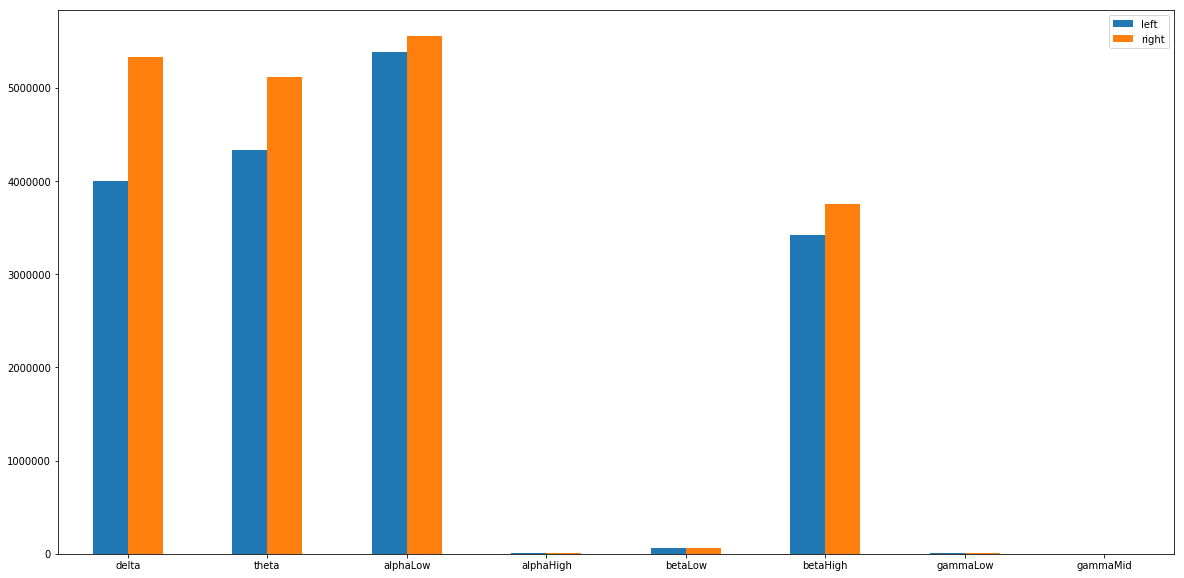

In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt 

u = [left.delta.mean(), left.theta.mean(), left.alphaLow.mean(), 
     left.betaHigh.mean(), left.betaLow.mean(), left.alphaHigh.mean(), 
     left.gammaLow.mean(), left.gammaMid.mean()]

d = [right.delta.mean(), right.theta.mean(), right.alphaLow.mean(), 
     right.betaHigh.mean(), right.betaLow.mean(), right.alphaHigh.mean(), 
     right.gammaLow.mean(), right.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'left': u, 'right': d}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [29]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

x_train = stan_scaler.fit_transform(x_train)
x_test = stan_scaler.transform(x_test)

all_data = dataDF.drop(['action'], axis=1)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))

scores = cross_val_score(rfc, all_data, labels, cv=10, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

[0.15847817 0.10743699 0.13243939 0.11967829 0.12559019 0.11192092
 0.13621121 0.10824484]
The score for Random Forest  0.62
450
Accuracy for x_test: 0.62
Cross Validation Accuracy: 0.54 (+/- 0.10)
[0.6        0.51666667 0.5        0.6        0.53333333 0.45
 0.51666667 0.6        0.55       0.5       ]


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

In [31]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print(xgb)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)

print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

scores = cross_val_score(xgb, all_data, labels, cv=30, scoring='accuracy')
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was pass

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
The score for XGBoost  0.6133333333333333
Accuracy for x_test: 0.6133333333333333
Accuracy: 61.33%
Cross Validation Accuracy: 0.60 (+/- 0.24)
[0.65 0.6  0.8  0.55 0.5  0.55 0.85 0.7  0.4  0.7  0.55 0.65 0.85 0.7
 0.55 0.5  0.45 0.5  0.65 0.5  0.55 0.6  0.6  0.85 0.45 0.6  0.6  0.45
 0.65 0.55]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_58 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 33        
Total para

450/450 [==============================] - 0s 519us/step - loss: 0.5085 - acc: 0.7422
Epoch 72/100
450/450 [==============================] - 0s 490us/step - loss: 0.4983 - acc: 0.7311
Epoch 73/100
450/450 [==============================] - 0s 495us/step - loss: 0.4726 - acc: 0.7289
Epoch 74/100
450/450 [==============================] - 0s 490us/step - loss: 0.5419 - acc: 0.6778
Epoch 75/100
450/450 [==============================] - 0s 500us/step - loss: 0.5036 - acc: 0.7044
Epoch 76/100
450/450 [==============================] - 0s 529us/step - loss: 0.5058 - acc: 0.7244
Epoch 77/100
450/450 [==============================] - 0s 495us/step - loss: 0.5197 - acc: 0.7244
Epoch 78/100
450/450 [==============================] - 0s 496us/step - loss: 0.5145 - acc: 0.7022
Epoch 79/100
450/450 [==============================] - 0s 495us/step - loss: 0.5005 - acc: 0.7156
Epoch 80/100
450/450 [==============================] - 0s 502us/step - loss: 0.5072 - acc: 0.7311
Epoch 81/100
450/450 [=

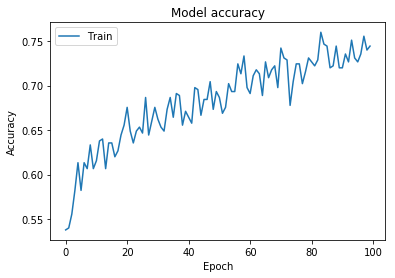

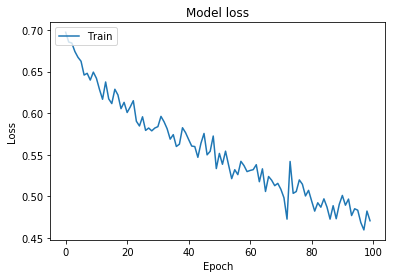

In [41]:
from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(32, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dropout(.5))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(32, activation="sigmoid"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=100, verbose=1, batch_size=3)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

# print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [44]:
all_labels = dataDF.action.values

encoder = LabelBinarizer()
all_labels = encoder.fit_transform(all_labels)
    
# create an array of shape 30706, 9 = number of records by the features
all_data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    all_data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

all_data = scaler.fit_transform(all_data)




/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:

from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, random_state=12)
avg_loss = []
avg_acc = []
# Loop through the indices the split() method returns
for index, (train_index, test_index) in enumerate(skf.split(all_data, labels)):
    print("Training on fold " + str(index + 1) + "/10.............................................")
    # Generate batches from indices
    x_train, x_test = all_data[train_index], all_data[test_index]
    # use one-hot vectors as labels
    y_train, y_test = labels[train_index], labels[test_index]

    network = models.Sequential()
    

    network.add(layers.Dense(32, input_shape=(8,)))
    network.add(layers.Dense(32, activation="relu"))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(16, activation="relu"))
    # network.add(layers.Dropout(0.3))
    network.add(layers.Dense(32, activation="sigmoid"))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Adam = Adam(lr=0.05)
    network.compile(optimizer=Adam(lr=0.0004),
                    loss='binary_crossentropy',
                    metrics=['acc'])

    network.summary()

    history = network.fit(x_train, y_train, validation_split=0.2,
                          epochs=40, verbose=1, batch_size=3)

    loss, accuracy = network.evaluate(x_test, y_test)

    # evaluate and store the accuracy
#     loss, accuracy = model.evaluate(xtest_imagelist, ytest, verbose=1)
    avg_loss.append(loss)
    avg_acc.append(accuracy)

    # cross validation score
    print("Average accuracy of model on the dev set = ", np.mean(avg_acc))

Training on fold 1/10.............................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_63 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_64 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 33        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_______

432/432 [==============================] - 0s 592us/step - loss: 0.6698 - acc: 0.6250 - val_loss: 0.8929 - val_acc: 0.0000e+00
Epoch 3/40
432/432 [==============================] - 0s 508us/step - loss: 0.6618 - acc: 0.6250 - val_loss: 0.9470 - val_acc: 0.0000e+00
Epoch 4/40
432/432 [==============================] - 0s 546us/step - loss: 0.6586 - acc: 0.6250 - val_loss: 0.9571 - val_acc: 0.0000e+00
Epoch 5/40
432/432 [==============================] - 0s 553us/step - loss: 0.6562 - acc: 0.6250 - val_loss: 0.9974 - val_acc: 0.0000e+00
Epoch 6/40
432/432 [==============================] - 0s 548us/step - loss: 0.6496 - acc: 0.6250 - val_loss: 0.9812 - val_acc: 0.0000e+00
Epoch 7/40
432/432 [==============================] - 0s 509us/step - loss: 0.6460 - acc: 0.6227 - val_loss: 0.9442 - val_acc: 0.0093
Epoch 8/40
432/432 [==============================] - 0s 543us/step - loss: 0.6430 - acc: 0.6204 - val_loss: 0.9332 - val_acc: 0.2037
Epoch 9/40
432/432 [==============================] -

432/432 [==============================] - 0s 587us/step - loss: 0.6382 - acc: 0.6389 - val_loss: 0.9558 - val_acc: 0.1852
Epoch 13/40
432/432 [==============================] - 0s 502us/step - loss: 0.6370 - acc: 0.6528 - val_loss: 0.9857 - val_acc: 0.1574
Epoch 14/40
432/432 [==============================] - 0s 500us/step - loss: 0.6355 - acc: 0.6505 - val_loss: 0.9512 - val_acc: 0.1852
Epoch 15/40
432/432 [==============================] - 0s 487us/step - loss: 0.6315 - acc: 0.6620 - val_loss: 0.9149 - val_acc: 0.1852
Epoch 16/40
432/432 [==============================] - 0s 493us/step - loss: 0.6319 - acc: 0.6505 - val_loss: 0.9845 - val_acc: 0.1574
Epoch 17/40
432/432 [==============================] - 0s 526us/step - loss: 0.6298 - acc: 0.6412 - val_loss: 1.0009 - val_acc: 0.1574
Epoch 18/40
432/432 [==============================] - 0s 571us/step - loss: 0.6299 - acc: 0.6551 - val_loss: 0.9543 - val_acc: 0.1759
Epoch 19/40
432/432 [==============================] - 0s 563us/ste

Epoch 23/40
432/432 [==============================] - 0s 552us/step - loss: 0.6235 - acc: 0.6481 - val_loss: 1.0533 - val_acc: 0.0741
Epoch 24/40
432/432 [==============================] - 0s 569us/step - loss: 0.6247 - acc: 0.6574 - val_loss: 0.9682 - val_acc: 0.1944
Epoch 25/40
432/432 [==============================] - 0s 578us/step - loss: 0.6225 - acc: 0.6620 - val_loss: 0.9922 - val_acc: 0.1667
Epoch 26/40
432/432 [==============================] - 0s 539us/step - loss: 0.6237 - acc: 0.6505 - val_loss: 0.9440 - val_acc: 0.2315
Epoch 27/40
432/432 [==============================] - 0s 580us/step - loss: 0.6237 - acc: 0.6435 - val_loss: 0.9922 - val_acc: 0.1574
Epoch 28/40
432/432 [==============================] - 0s 541us/step - loss: 0.6178 - acc: 0.6551 - val_loss: 1.0678 - val_acc: 0.0833
Epoch 29/40
432/432 [==============================] - 0s 575us/step - loss: 0.6207 - acc: 0.6481 - val_loss: 0.9574 - val_acc: 0.2407
Epoch 30/40
432/432 [==============================] - 

432/432 [==============================] - 0s 581us/step - loss: 0.6101 - acc: 0.6574 - val_loss: 1.0061 - val_acc: 0.2500
Epoch 34/40
432/432 [==============================] - 0s 545us/step - loss: 0.6126 - acc: 0.6597 - val_loss: 0.9793 - val_acc: 0.2685
Epoch 35/40
432/432 [==============================] - 0s 586us/step - loss: 0.6088 - acc: 0.6736 - val_loss: 1.0363 - val_acc: 0.2130
Epoch 36/40
432/432 [==============================] - 0s 555us/step - loss: 0.6091 - acc: 0.6620 - val_loss: 1.0075 - val_acc: 0.2500
Epoch 37/40
432/432 [==============================] - 0s 585us/step - loss: 0.6062 - acc: 0.6713 - val_loss: 0.9339 - val_acc: 0.2593
Epoch 38/40
432/432 [==============================] - 0s 578us/step - loss: 0.6063 - acc: 0.6759 - val_loss: 0.9943 - val_acc: 0.2500
Epoch 39/40
432/432 [==============================] - 0s 548us/step - loss: 0.6046 - acc: 0.6806 - val_loss: 1.0242 - val_acc: 0.2593
Epoch 40/40
60/60 [==============================] - 0s 29us/step
A

Train on 432 samples, validate on 108 samples
Epoch 1/40
432/432 [==============================] - 2s 4ms/step - loss: 0.6885 - acc: 0.5394 - val_loss: 0.8344 - val_acc: 0.0000e+00
Epoch 2/40
432/432 [==============================] - 0s 602us/step - loss: 0.6633 - acc: 0.6250 - val_loss: 0.9466 - val_acc: 0.0000e+00
Epoch 3/40
432/432 [==============================] - 0s 591us/step - loss: 0.6591 - acc: 0.6250 - val_loss: 0.9584 - val_acc: 0.0000e+00
Epoch 4/40
432/432 [==============================] - 0s 566us/step - loss: 0.6547 - acc: 0.6250 - val_loss: 0.9746 - val_acc: 0.0000e+00
Epoch 5/40
432/432 [==============================] - 0s 571us/step - loss: 0.6511 - acc: 0.6250 - val_loss: 0.9787 - val_acc: 0.0000e+00
Epoch 6/40
432/432 [==============================] - 0s 571us/step - loss: 0.6489 - acc: 0.6250 - val_loss: 0.9737 - val_acc: 0.0000e+00
Epoch 7/40
432/432 [==============================] - 0s 607us/step - loss: 0.6436 - acc: 0.6366 - val_loss: 0.9896 - val_acc: 0

432/432 [==============================] - 0s 665us/step - loss: 0.6359 - acc: 0.6620 - val_loss: 0.9623 - val_acc: 0.1389
Epoch 12/40
432/432 [==============================] - 0s 635us/step - loss: 0.6314 - acc: 0.6620 - val_loss: 0.9683 - val_acc: 0.1389
Epoch 13/40
432/432 [==============================] - 0s 624us/step - loss: 0.6289 - acc: 0.6620 - val_loss: 1.0505 - val_acc: 0.1389
Epoch 14/40
432/432 [==============================] - 0s 633us/step - loss: 0.6299 - acc: 0.6644 - val_loss: 0.8855 - val_acc: 0.1944
Epoch 15/40
432/432 [==============================] - 0s 626us/step - loss: 0.6281 - acc: 0.6597 - val_loss: 0.8908 - val_acc: 0.2130
Epoch 16/40
432/432 [==============================] - 0s 626us/step - loss: 0.6287 - acc: 0.6597 - val_loss: 0.9999 - val_acc: 0.1389
Epoch 17/40
432/432 [==============================] - 0s 631us/step - loss: 0.6239 - acc: 0.6644 - val_loss: 0.9492 - val_acc: 0.1852
Epoch 18/40
432/432 [==============================] - 0s 626us/ste

Epoch 22/40
432/432 [==============================] - 0s 661us/step - loss: 0.6276 - acc: 0.6620 - val_loss: 0.9899 - val_acc: 0.1019
Epoch 23/40
432/432 [==============================] - 0s 661us/step - loss: 0.6270 - acc: 0.6597 - val_loss: 1.0307 - val_acc: 0.1019
Epoch 24/40
432/432 [==============================] - 0s 672us/step - loss: 0.6256 - acc: 0.6667 - val_loss: 0.8965 - val_acc: 0.1759
Epoch 25/40
432/432 [==============================] - 0s 604us/step - loss: 0.6268 - acc: 0.6667 - val_loss: 0.9668 - val_acc: 0.1296
Epoch 26/40
432/432 [==============================] - 0s 663us/step - loss: 0.6232 - acc: 0.6667 - val_loss: 0.9142 - val_acc: 0.1759
Epoch 27/40
432/432 [==============================] - 0s 601us/step - loss: 0.6229 - acc: 0.6667 - val_loss: 1.0390 - val_acc: 0.1019
Epoch 28/40
432/432 [==============================] - 0s 633us/step - loss: 0.6220 - acc: 0.6736 - val_loss: 1.0039 - val_acc: 0.1296
Epoch 29/40
432/432 [==============================] - 

432/432 [==============================] - 0s 699us/step - loss: 0.6080 - acc: 0.6736 - val_loss: 1.0096 - val_acc: 0.1667
Epoch 33/40
432/432 [==============================] - 0s 638us/step - loss: 0.6025 - acc: 0.6667 - val_loss: 1.0022 - val_acc: 0.1944
Epoch 34/40
432/432 [==============================] - 0s 633us/step - loss: 0.6023 - acc: 0.6898 - val_loss: 1.1055 - val_acc: 0.1667
Epoch 35/40
432/432 [==============================] - 0s 631us/step - loss: 0.6026 - acc: 0.6852 - val_loss: 0.9711 - val_acc: 0.2037
Epoch 36/40
432/432 [==============================] - 0s 638us/step - loss: 0.6024 - acc: 0.6829 - val_loss: 0.9662 - val_acc: 0.2315
Epoch 37/40
432/432 [==============================] - 0s 633us/step - loss: 0.5975 - acc: 0.6782 - val_loss: 0.8270 - val_acc: 0.3519
Epoch 38/40
432/432 [==============================] - 0s 632us/step - loss: 0.6010 - acc: 0.6898 - val_loss: 1.0452 - val_acc: 0.1667
Epoch 39/40
432/432 [==============================] - 0s 641us/ste